<a href="https://colab.research.google.com/github/anathnath/PythonProject2020/blob/master/Physics_Lab_SimulationProjectile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{green}{PROJECTILE ~~MOTION: PYTHON~~ PROJECT}$

## Newton's Equation of motion:
#$M \frac{d^2\vec{r}}{dt^2}=\vec{F}..........Eq.(1)$

In this exercise, we will use a simple script to plot the trajectory of a projectile with inclusion of air resistance. We will also calculate the range of the projectile. 

The air resistance drag force $F_d$ in $N$ is approximated by the following relation. 

  $$ F_d = C_d v^2 $$

Here, $v$ is the magnitude of velocity in $m/s$ and $C_d$ is the coefficient of drag.

The following is a step-by-step guide to writing up the script. Some parts of the script have been left out for you to fill in.
Considering drag force components of force (2D Case) of Eq.(1) we get,\
# $M \frac{d^2x}{dt^2}= -C_d v_x^2 ~~~ and  ~~M \frac{d^2y}{dt^2}=-Mg -C_d v_y^2$


### The parameters of the projectile motion:

First we import the modules we need: numpy \
 to provide some mathematics functions, and matplotlib for plotting. 

To start describing the problem, we need to define the parameters in the problem.

- The mass of the projectile
- Acceleration due to gravity
- Initial velocity (magnitude and direction)
- Drag coefficient

We also set the time step to track the trajectory. 


In [6]:
import plotly.graph_objects as go
import numpy as np
v = 30 
g = 9.81  #improved g to standard precision, set it to positive

theta1=45*np.pi/180
theta2=30*np.pi/180
theta3=60*np.pi/180

#plt.figure(figsize=(8,6))
tmax1 = ((2 * v) * np.sin(theta1)) / g
timemat1 = tmax1*np.linspace(0,1,100)
tmax2 = ((2 * v) * np.sin(theta2)) / g
timemat2 = tmax2*np.linspace(0,1,100)

tmax3 = ((2 * v) * np.sin(theta3)) / g
timemat3 = tmax3*np.linspace(0,1,100)

x = ((v * timemat1) * np.cos(theta1))
y = ((v * timemat) * np.sin(theta1)) - ((0.5 * g) * (timemat1 ** 2))

x1 = 30*np.cos(theta2)*timemat2
y1 = 30*np.sin(theta2)*timemat2 - .5*9.8*timemat2 ** 2

x2 = 30*np.cos(theta3)*timemat3
y2 = 30*np.sin(theta3)*timemat3 - .5*9.8*timemat3 ** 2

xm = np.min(x)-1.5 
xM = np.max(x)+1.5 
ym = np.min(y)-1.5
yM = np.max(y)+1.5

fig = go.Figure()
# ADD TRACES OF MULTI GRAPHS

# Add traces
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='markers'))
fig.add_trace(go.Scatter(x=x1, y=y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=x2, y=y2,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()

In [14]:
import plotly.graph_objects as go
import numpy as np

tmax=2*30*np.sin(45*np.pi/180)/10
t = tmax*np.linspace(0, 1, 100)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=30*np.cos(45*np.pi/180)*t, y=30*np.sin(45*np.pi/180)*t-.5*10*t**2,
    name='sin',
    mode='markers',
    marker_color='blue' #'rgba(152, 0, 0, .8)'
))
tmax=2*30*np.sin(30*np.pi/180)/10
t = tmax*np.linspace(0, 1, 100)

fig.add_trace(go.Scatter(
    x=30*np.cos(30*np.pi/180)*t, y=30*np.sin(30*np.pi/180)*t-.5*10*t**2,
    name='sin',
    mode='markers',
    marker_color='red' #'rgba(152, 0, 0, .8)'
))
tmax=2*30*np.sin(60*np.pi/180)/10
t = tmax*np.linspace(0, 1, 100)

fig.add_trace(go.Scatter(
    x=30*np.cos(60*np.pi/180)*t, y=30*np.sin(60*np.pi/180)*t-.5*10*t**2,
    name='sin',
    mode='markers',
    marker_color='green' #'rgba(152, 0, 0, .8)'
))

# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=2, marker_size=5)
fig.update_layout(title='Projectile Motion at Different Angle:',
                  yaxis_zeroline=False, xaxis_zeroline=False)


fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)


80 60.0


### Set up the variables at time zero

Next, we generate velocity of the projectile as a function of time. To do that, we create the following lists.

- list to store the values of time $t$
- list to store x-component of velocity $v_x$
- list to store y-component of velocity $v_y$
- list to store x-component of acceleration $a_x$
- list to store y-component of acceleration $a_y$

We start by putting in the initial velocity components $v_x = V \cos\theta$ and $v_y = V \sin\theta$  at $t=0$. 

To get the acceleration, we need to find the resultant force, which consists of the air drag $F_d$ and weight $W$.

$$ W = M g$$ 

and 

$$ F_d = C_d v^2 $$

The x and y components of the resultant force are given by

$$ F_x = - F_d \cos\theta \qquad \text{and} \qquad F_y = -Mg - F_d \sin\theta $$

where $\theta$ is the angle that the velocity forms with the positive x-axis. The force components follow the convention that they are positive when pointing to the right and upwards.

By Newton's second law, the acceleration of the projectile is thus given by

$$ a_x = - (F_d \cos\theta)/M \qquad \text{and} \qquad a_y = -g - (F_d \sin\theta)/M $$

Let's implement these steps to get the velocity, drag force, and acceleration at $t=0$.


In [ ]:
# Set up the lists to store variables
# Start by putting the initial velocities at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]

# Drag force
drag = Cd*V**2                      # drag force 

# Create the lists for acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M]        
ay = [-g-(drag*np.sin(ang/180*np.pi)/M)]

# Print out some values to check
print(ax[0])
print(ay[0])
print(vx[0])
print(vy[0])

-16.000000000000004
-37.51281292110204
40.00000000000001
69.28203230275508


### Update the velocity for every time-step

To get the velocity at the next time step, we make use of the following approximation.

$$ a(t_{n}) = \frac{dv(t_{n})}{dt} \approx \frac{v(t_{n+1}) - v(t_n)}{\Delta t} $$

or 

$$ v(t_{n+1}) \approx v(t_n) +  a(t_n) \Delta t $$

This is just a very primitive way of doing integration of acceleration to get velocity. In the literature, this is known as Euler's method.

Let us calculate 10 sets of velocities for 10 time-steps. We will use a while-loop and keep a counter to count to 10.

t= [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
vx= [40.00000000000001, 32.00000000000001, 27.528951416567008, 24.787883378136915, 23.02339491459251, 21.846818145611152, 21.027776019653995, 20.413445666052425, 19.89116281938412, 19.368416481078107, 18.760291921319446]


Text(0.5, 0, 'time (s)')

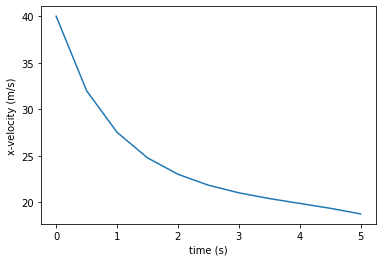

In [ ]:
# Use Euler method to update variables
counter = 0
while (counter < 10):
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])  

    # With the new velocity calculate the drag force
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1

# Print the values to check
print("t=", t)
print("vx=", vx)

# Let's plot the velocity against time
plt.plot(t,vx)
plt.ylabel("x-velocity (m/s)")
plt.xlabel("time (s)")




### Update the positions

After we have obtained the velocities, we can get the $x$ and $y$ positions of the projectile using a similar concept.

$$ v_x(t_{n}) = \frac{dx(t_{n})}{dt} \approx \frac{x(t_{n+1}) - x(t_n)}{\Delta t} 
   \qquad \text{and} \qquad 
   v_y(t_{n}) = \frac{dy(t_{n})}{dt} \approx \frac{y(t_{n+1}) - y(t_n)}{\Delta t}
$$

or 

$$ x(t_{n+1}) \approx x(t_n) +  v_x(t_n) \Delta t 
   \qquad \text{and} \qquad 
   y(t_{n+1}) \approx y(t_n) +  v_y(t_n) \Delta t 
$$

Starting with $x=0$ and $y=0$ at $t=0$, we can use Euler's method to get the positions for the 10 time-steps using the velocities found previously.

Range of projectile is 124.9 m


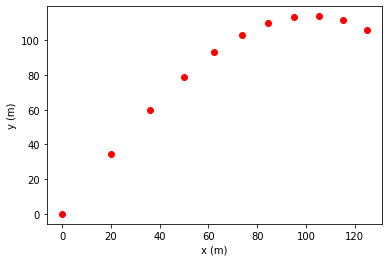

In [ ]:
# Initialise the lists for x and y
x = [0]
y = [0]

# Use Euler method to update variables
counter = 0
while (counter < 10):
    # Update the positions x and y
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    
    # Increment the counter by 1
    counter = counter +1


# Let's plot the trajectory
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
print("Range of projectile is {:3.1f} m".format(x[counter]))

### Let's put everything together

How about calculating the velocity and position all together in the same while-loop? 

Also, let's stop the while-loop after the projectile drops back to the ground again. One simple way to detect this is to check whether the value of $y$ position falls below zero. So, we keep running the while-loop while $y \ge 0$.


80 60.0
Range of projectile is 174.4 m


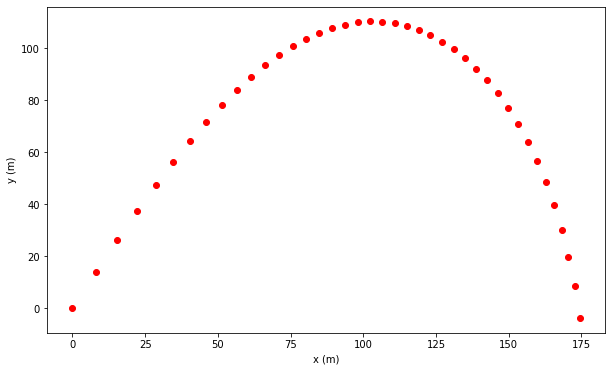

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)

# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2                      # drag force 

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ]          
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

## Leave this out for students to try
# We can choose to have better control of the time-step here
dt = 0.2

# Use Euler method to update variables
counter = 0
while (y[counter] >= 0):                   # Check that the last value of y is >= 0
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    
    
    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1

# Let's plot the trajectory
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
   
# The last value of x should give the range of the projectile approximately.

print("Range of projectile is {:3.1f} m".format(x[counter]))


80 60.0
80 60.0
80 60.0


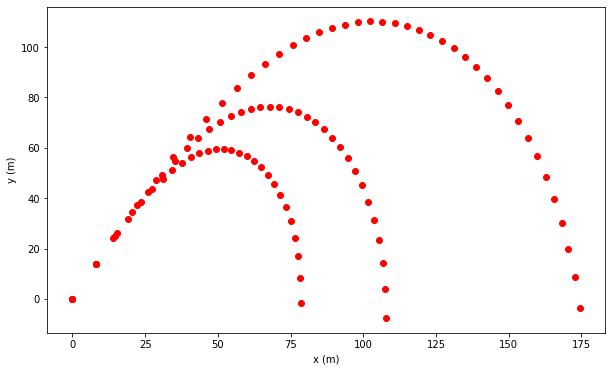

In [ ]:
# Plot with different drag Coefficient
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
list=[.005,.010,.015]
plt.figure(figsize=(10,6))
for i in list:
  # Model parameters
  M = 1.0          # Mass of projectile in kg
  g = 9.8          # Acceleration due to gravity (m/s^2)
  V = 80           # Initial velocity in m/s
  ang = 60.0       # Angle of initial velocity in degrees
  Cd = i       # Drag coefficient
  dt = 0.5         # time step in s

  # You can check the variables by printing them out
  print(V, ang)

# Set up the lists to store variables
# Initialize the velocity and position at t=0
  t = [0]                         # list to keep track of time
  vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
  vy = [V*np.sin(ang/180*np.pi)]
  x = [0]                         # list for x and y position
  y = [0]

  # Drag force
  drag=Cd*V**2                      # drag force 

  # Acceleration components
  ax = [-(drag*np.cos(ang/180*np.pi))/M ]          
  ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

  ## Leave this out for students to try
  # We can choose to have better control of the time-step here
  dt = 0.2

  # Use Euler method to update variables
  counter = 0
  while (y[counter] >= 0):                   # Check that the last value of y is >= 0
     t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    
    
     # Update velocity
     vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
     vy.append(vy[counter]+dt*ay[counter])

     # Update position
     x.append(x[counter]+dt*vx[counter])    
     y.append(y[counter]+dt*vy[counter])    

     # With the new velocity calculate the drag force and update acceleration
     vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
     drag = Cd*vel**2                                   # drag force 
     ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
     ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
     # Increment the counter by 1
     counter = counter +1

    # Let's plot the trajectory
  plt.plot(x,y,'ro')
  plt.ylabel("y (m)")
  plt.xlabel("x (m)")

### How far can the projectile go?

Try changing the initial velocity of the projectile and the drag coefficient to see how the trajectory changes.

Keeping the initial velocity magnitude fixed, find the initial velocity angle that will give the maximum range for a specific drag coefficient!


In [ ]:
import plotly.graph_objects as go

import numpy as np

# Generate curve data
#t = np.linspace(0, 60, 100)
#initialize variables 
#velocity, gravity
v = 30 
g = 9.81  #improved g to standard precision, set it to positive
#increment theta 25 to 60 then find  t, x, y
#define x and y as arrays 
#theta = np.arange(25,65,5)[None,:]/180.0*np.pi #convert to radians, watch out for modulo division
theta=45

#plt.figure(figsize=(8,6))
tmax = ((2 * v) * np.sin(theta)) / g
timemat = tmax*np.linspace(0,1,100)

x = ((v * timemat) * np.cos(theta))
y = ((v * timemat) * np.sin(theta)) - ((0.5 * g) * (timemat ** 2))

x1 = 30*np.cos(60)*timemat
y1 = 30*np.sin(60)*timemat - .5*9.8*timemat ** 2
xm = np.min(x)-1.5 
xM = np.max(x)+1.5 
ym = np.min(y)-1.5
yM = np.max(y)+1.5
N = 10
s = tmax*np.linspace(0,1,N)
xx = ((v * s) * np.cos(theta))
yy =((v * s) * np.sin(theta)) - ((0.5 * g) * (s ** 2))
xx1 = ((v * s) * np.cos(60))
yy1 =((v * s) * np.sin(60)) - ((0.5 * g) * (s ** 2))

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Projectile Motion", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=20))])

        for k in range(N)]
)

fig.show()

   

### Trivial

If you set the coefficient of drag to zero, can you get back the same trajectory you learned in Physics? Try checking the range of the projectile against the closed-form solution.

80 60.0
Range of projectile is 576.0 m


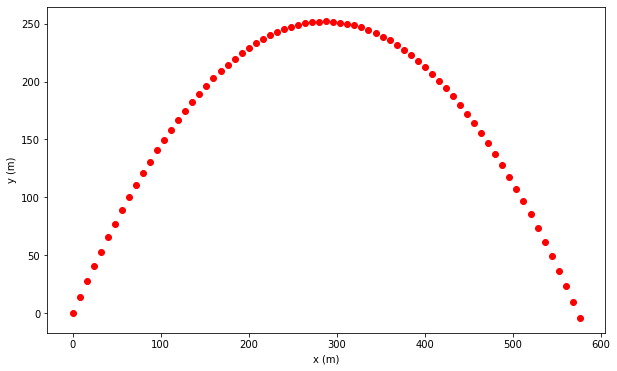

In [ ]:
# Coefficent of drag=0 we get back same trajectory without air drag
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.0       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)

# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2                      # drag force 

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ]          
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

## Leave this out for students to try
# We can choose to have better control of the time-step here
dt = 0.2

# Use Euler method to update variables
counter = 0
while (y[counter] >= 0):                   # Check that the last value of y is >= 0
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    
    
    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1

# Let's plot the trajectory
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
   
# The last value of x should give the range of the projectile approximately.

print("Range of projectile is {:3.1f} m".format(x[counter]))

In [24]:
# With Drag of Force
import plotly.graph_objects as go
import numpy as np

# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.015       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)

# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2                      # drag force 

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ]          
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

## Leave this out for students to try
# We can choose to have better control of the time-step here
dt = 0.2

# Use Euler method to update variables
counter = 0
while (y[counter] >= 0):                   # Check that the last value of y is >= 0
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    
    
    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1




fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,y=y,
    name='With Drag',
    mode='markers',
    marker_color='blue' #'rgba(152, 0, 0, .8)'
))
tmax=2*80*np.sin(60*np.pi/180)/10
t = tmax*np.linspace(0, 1, 100)

fig.add_trace(go.Scatter(
    x=80*np.cos(60*np.pi/180)*t, y=80*np.sin(60*np.pi/180)*t-.5*9.8*t**2,
    name='Without Drag',
    mode='markers',
    marker_color='red' #'rgba(152, 0, 0, .8)'
))
# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)

# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2                      # drag force 

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ]          
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

## Leave this out for students to try
# We can choose to have better control of the time-step here
dt = 0.2

# Use Euler method to update variables
counter = 0
while (y[counter] >= 0):                   # Check that the last value of y is >= 0
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    
    
    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1


fig.add_trace(go.Scatter(
    x=x, y=y,
    name='Projectile With Drag',
    mode='markers',
    marker_color='green' #'rgba(152, 0, 0, .8)'
))

# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=2, marker_size=5)
fig.update_layout(title='Projectile Motion at Angle 60 Degree:',
                  yaxis_zeroline=False, xaxis_zeroline=False)


fig.show()

80 60.0
80 60.0
